In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(x_train, _), (x_test, y_test) = mnist.load_data()

# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized把范围变成-0.5到+0.5
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)

Using TensorFlow backend.


(60000, 784)
(10000, 784)


In [2]:
# in order to plot in a 2D figure
encoding_dim = 2

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))

In [4]:
# encoder layers
encoded=Dense(128,activation='relu')(input_img)#后面的括号里面是输入哈
encoded=Dense(64,activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

In [5]:
# decoder layers
# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

In [6]:
# construct the autoencoder model
autoencoder = Model(input=input_img, output=decoded)

D:\PY\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [7]:
# construct the encoder model for plotting
encoder=Model(input=input_img,output=encoder_output)

D:\PY\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [8]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 5s - loss: 0.0686     
Epoch 2/20
60000/60000 [==============================] - 1s - loss: 0.0563     
Epoch 3/20
60000/60000 [==============================] - 1s - loss: 0.0523     
Epoch 4/20
60000/60000 [==============================] - 1s - loss: 0.0488     
Epoch 5/20
60000/60000 [==============================] - 1s - loss: 0.0469     
Epoch 6/20
60000/60000 [==============================] - 1s - loss: 0.0459     
Epoch 7/20
60000/60000 [==============================] - 1s - loss: 0.0451     
Epoch 8/20
60000/60000 [==============================] - 1s - loss: 0.0444     
Epoch 9/20
60000/60000 [==============================] - 1s - loss: 0.0439     
Epoch 10/20
60000/60000 [==============================] - 1s - loss: 0.0435     
Epoch 11/20
60000/60000 [==============================] - 1s - loss: 0.0432     
Epoch 12/20
60000/60000 [==============================] - 1s - loss: 0.0429     
Epoch 13/20
60000/60000 [

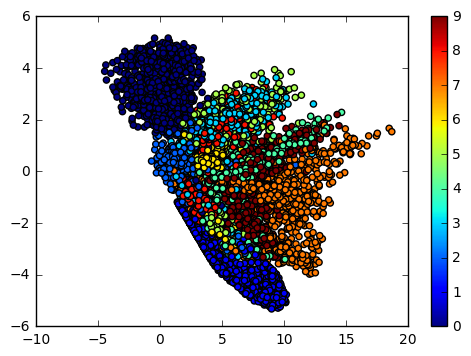

In [10]:
# plotting
# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()